Hotel operators in Ritz Jager Hotel want to improve their business efficiency by utilizing their historical data and they want to find out what happened in their previous bookings, knowing their customer better, and optimizing the promo timing. Data will be analyzed based on questions that have been predetermined by the CEO of the hotel.
1.	Where do the guests come from?
2.	How much do guests pay for a room per night?
3.	How does the price per night vary over the year?
4.	Which are the busiest months?
5.	How long do people stay at the hotels?
6.	Bookings by market segment
7.	How many bookings were cancelled?
8.	Which month has the highest number of cancellations?
This analysis is done using Python (Jupyter Notebook). The libraries to be used are numpy, pandas, matplotlib, seaborn, and scipy.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Ritz_Jager_Data.csv')
df.head(20)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/4/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

In [5]:
df.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal_type                              0
country_origin                       488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,company,112593,94.306893
1,agent,16340,13.686238
2,country_origin,488,0.408744
3,children,4,0.003350
4,reserved_room_type,0,0.000000
5,assigned_room_type,0,0.000000
6,booking_changes,0,0.000000
7,deposit_type,0,0.000000
8,hotel_type,0,0.000000
9,previous_cancellations,0,0.000000


## Handling missing value

The company column will be dropped because the number of missing values is more than 80%. The column agent and children have missing values less than 20% and are discrete variables, so they will be filled with mode. The country column has 0.4% missing values and is a categorical variable. This column will be filled with mode, because it will not change the meaning of the data.

In [7]:
#Drop column because missing value greater than 80%
df.drop('company', axis = 1, inplace = True)
#Fill agents, country_origin, and children with mode
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['country_origin'].fillna(df['country_origin'].mode()[0], inplace=True)
df['children'].fillna(df['children'].mode()[0], inplace=True)
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,hotel_type,0,0.0
1,is_repeated_guest,0,0.0
2,reservation_status,0,0.0
3,total_of_special_requests,0,0.0
4,required_car_parking_spaces,0,0.0
5,adr,0,0.0
6,customer_type,0,0.0
7,days_in_waiting_list,0,0.0
8,agent,0,0.0
9,deposit_type,0,0.0


## 1. Where do the guests come from?

In [8]:
df_nocancel = df[df['is_canceled']==False]
df_nocancelrepeat = df[(df['is_canceled']==False) & (df['is_repeated_guest']==0)]

In [9]:
print(df_nocancelrepeat['country_origin'].value_counts())

PRT    18764
GBR     9570
FRA     8409
ESP     6307
DEU     6044
       ...  
ZMB        1
DMA        1
SLE        1
MAC        1
PYF        1
Name: country_origin, Length: 165, dtype: int64


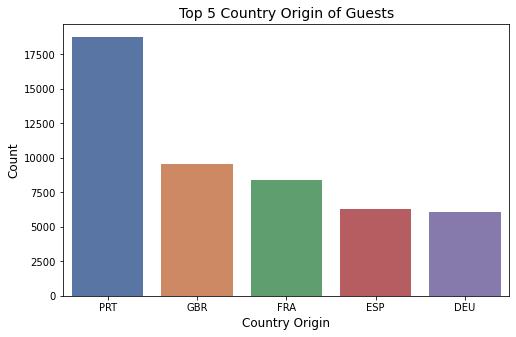

In [10]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df_nocancelrepeat["country_origin"], 
                   order = df_nocancelrepeat["country_origin"].value_counts().iloc[:5].index, 
                   palette = "deep")
ax.set_title("Top 5 Country Origin of Guests", size = 14)
ax.set_xlabel("Country Origin", size = 12)
ax.set_ylabel("Count", size = 12)
plt.show()

## 2. How much do guests pay for a room per night?

In [11]:
all_hotel = df[(df['is_canceled']== False) & (df['adr']>0)]
rh = df[(df['is_canceled']== False) & (df['adr']>0) & (df['hotel_type']=='Resort Hotel')]
ch = df[(df['is_canceled']== False) & (df['adr']>0) & (df['hotel_type']=='City Hotel')]


In [12]:
price_type = all_hotel.groupby('hotel_type')['adr'].mean()

print('The average price for all hotel is ${}'.format(all_hotel['adr'].mean()))
print('The average price for Resort Hotel is ${}'.format(rh['adr'].mean()))
print('The average price for City Hotel is ${}'.format(ch['adr'].mean()))

The average price for all hotel is $102.3669800732752
The average price for Resort Hotel is $92.9344750619053
The average price for City Hotel is $108.27313340272732


In [13]:
price_room = pd.pivot_table(all_hotel, index = ['hotel_type', 'assigned_room_type'], values = 'adr', aggfunc = np.mean )
print('The following is the average price for each room type for each hotel type:\n')
price_room

The following is the average price for each room type for each hotel type:



adr
hotel_type   assigned_room_type            
City Hotel   A                    99.078326
             B                    97.518135
             C                   110.417879
             D                   117.913473
             E                   142.225000
             F                   178.171620
             G                   196.841696
             K                   102.107391
Resort Hotel A                    81.309890
             B                   105.815517
             C                   108.913320
             D                    82.425891
             E                   102.462598
             F                   120.389556
             G                   153.179443
             H                   162.198575
             I                    90.872089

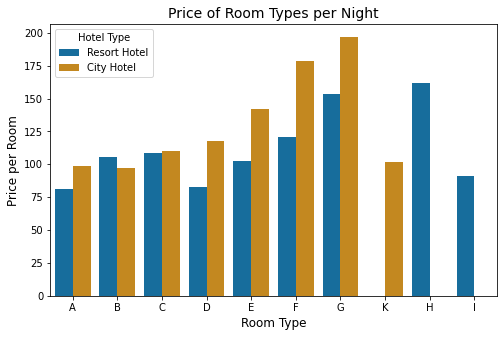

In [14]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x='assigned_room_type', y='adr', data = price_room.reset_index(), hue= 'hotel_type',
                 palette = "colorblind", hue_order = ["Resort Hotel", "City Hotel"])
ax.set_title("Price of Room Types per Night", size = 14)
ax.set_xlabel("Room Type", size = 12)
ax.set_ylabel("Price per Room", size = 12)
ax.legend().set_title("Hotel Type")
plt.show()

## 3. How does the price per night vary over the year?

In [15]:
hotel_price_df = all_hotel[(all_hotel.loc[:,'adults'] > 0) & 
                          (all_hotel.loc[:,'children'] > 0)]
#Create new feature [Total Guests]
hotel_price_df.loc[:,'total guests'] = hotel_price_df.loc[:,'adults'] + hotel_price_df.loc[:,'children']

#Create new feature [Guest Pay]
hotel_price_df.loc[:,'guests pay'] = hotel_price_df.loc[:,'adr'] / hotel_price_df.loc[:,'total guests']

In [16]:
#Price changes every year
price_change = hotel_price_df.groupby('arrival_date_year')['guests pay'].mean()
price_change

arrival_date_year
2015    41.217742
2016    44.494974
2017    50.872834
Name: guests pay, dtype: float64

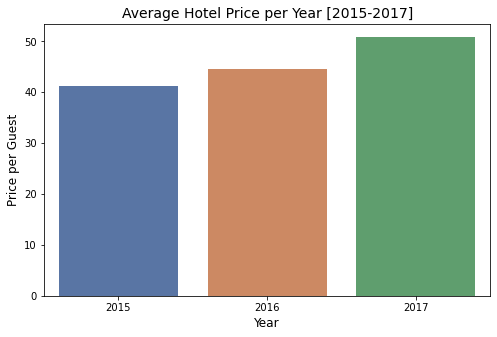

In [17]:
plt.figure(figsize = (8,5))
ax = sns.barplot(x = 'arrival_date_year', y = 'guests pay', data = price_change.reset_index(), palette = "deep")
ax.set_title("Average Hotel Price per Year [2015-2017]", size = 14)
ax.set_xlabel("Year", size = 12)
ax.set_ylabel("Price per Guest", size = 12)
plt.show()

In [18]:
#Price per room changes every month
hotel_price_df.loc[:,'arrival_date_month'] = pd.Categorical(hotel_price_df.loc[:,'arrival_date_month'] ,ordered=True,
                                                         categories=['January','February','March','April',
                                                                     'May','June','July','August','September',
                                                                     'October','November','December'])
price_change_month = hotel_price_df.groupby('arrival_date_month')['guests pay'].mean()
price_change_month

arrival_date_month
January      32.883312
February     33.389325
March        36.088138
April        44.343443
May          45.732996
June         49.461121
July         52.083551
August       56.410046
September    47.381230
October      38.218525
November     29.931883
December     37.164883
Name: guests pay, dtype: float64

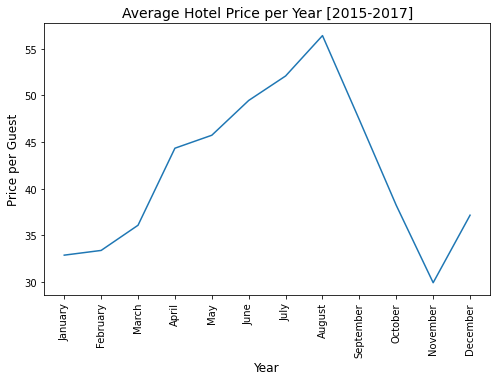

In [19]:
#Price per room changes every month
plt.figure(figsize = (8,5))
ax = sns.lineplot(x='arrival_date_month', y='guests pay', 
                  data= hotel_price_df.groupby('arrival_date_month')['guests pay'].mean().reset_index())
ax.set_title("Average Hotel Price per Year [2015-2017]", size = 14)
ax.set_xlabel("Year", size = 12)
ax.set_ylabel("Price per Guest", size = 12)
plt.xticks(rotation=90)
plt.show()

The average hotel price increased significantly from May to August. The highest hotel prices occur in August, because it is summer season and many people are on vacation.
Average hotel prices fell significantly from August to November, due to autumn season. There is an increase in hotel prices from November to December, as some people go on year-end holidays.

## 4. Which are the busiest month?

In [20]:
def busiest_month(data, hotel):
    if hotel != "All Hotel":
        data = data[data["hotel_type"] == hotel]
    count_month = data['arrival_date_month'].value_counts()
    print("The following is the number of guests each month:")
    print(count_month)
    plt.figure(figsize =(16,8))
    ax = sns.countplot('arrival_date_month', data = data, order =['January','February','March','April','May',
                                                                  'June','July','August','September','October',
                                                                  'November','December'])
    for p in ax.patches:
        if p.get_bbox().get_points()[1,1]== max(count_month):
            p.set_color('tomato')
        elif p.get_bbox().get_points()[1,1]== min(count_month):
            p.set_color('aquamarine')
        else:
            p.set_color('tan');
    ax.set_title("Busiest Month for {}".format(hotel), size = 16)
    ax.set_xlabel("Month", size = 12)
    ax.set_ylabel("Number of Guests", size = 12)
    plt.show()
    plt.show()

### All hotel

The following is the number of guests each month:
August       8638
July         7919
May          7114
October      6914
March        6645
April        6565
June         6404
September    6392
February     5372
November     4672
December     4409
January      4122
Name: arrival_date_month, dtype: int64


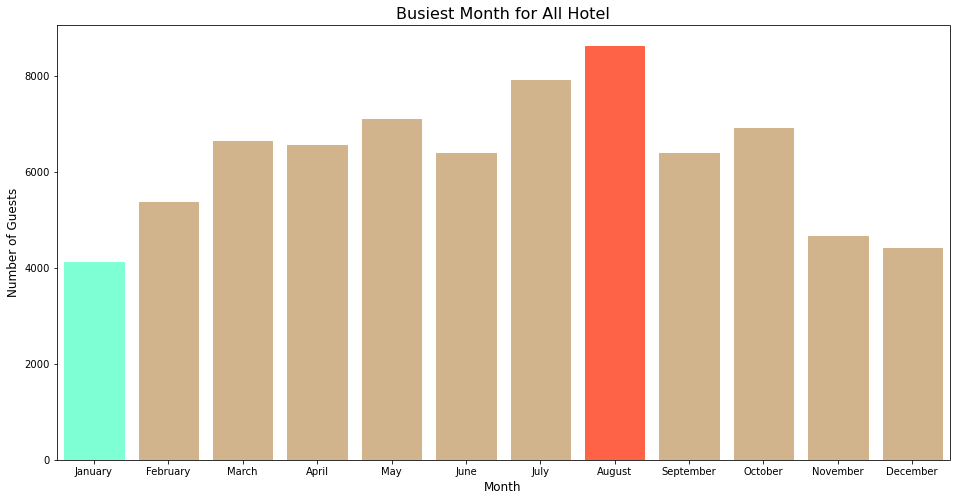

In [21]:
busiest_month(df_nocancel, "All Hotel")

### City Hotel

The following is the number of guests each month:
August       5381
July         4782
May          4579
June         4366
October      4337
September    4290
March        4072
April        4015
February     3064
November     2696
December     2392
January      2254
Name: arrival_date_month, dtype: int64


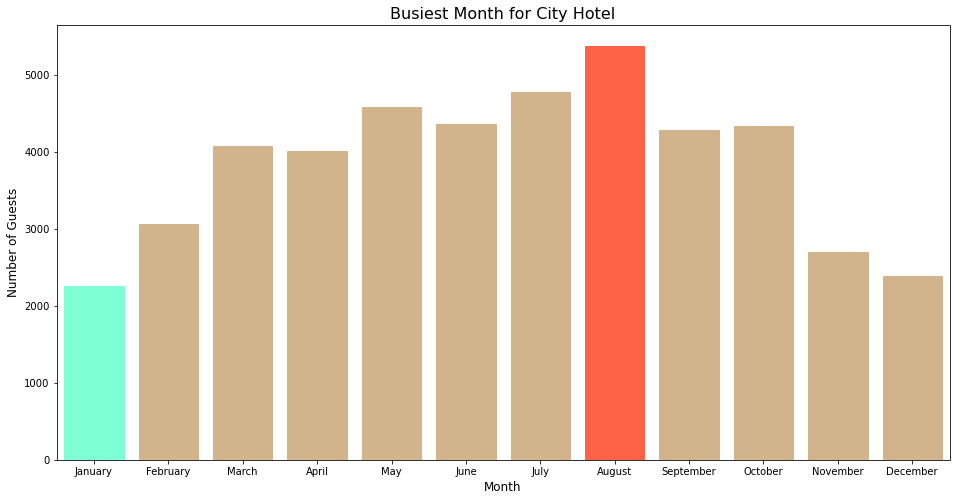

In [22]:
busiest_month(df_nocancel, "City Hotel")

### Resort Hotel

The following is the number of guests each month:
August       3257
July         3137
October      2577
March        2573
April        2550
May          2535
February     2308
September    2102
June         2038
December     2017
November     1976
January      1868
Name: arrival_date_month, dtype: int64


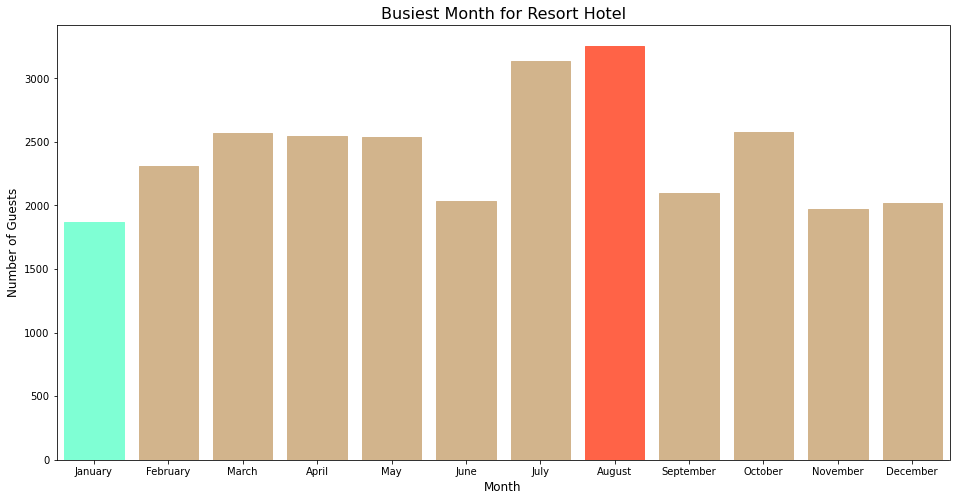

In [23]:
busiest_month(df_nocancel, "Resort Hotel")

The busiest month for all hotel types is August, as many take summer vacations. And the least busy month is January. If the hotel wants to provide a promo, it's best not in August, because even though hotel prices are highest in August, the number of guests is still the highest. January can be the right choice to give promotions because hotels are not too busy.

## 5. How long do people stay at the hotels?

In [24]:
#Creating a new column that defines how long people stay in hotel
df_nocancel.loc[:,'total_stay'] = df_nocancel.loc[:, 'stays_in_weekend_nights'] + df_nocancel.loc[:, 'stays_in_week_nights']

#Creating "stay" function
def stay(data, hotel):
    if hotel == "all hotel":
        avg_stay = data["total_stay"].mean()
    else:
        avg_stay = data[df["hotel_type"]==hotel]['total_stay'].mean()
    print("The average person stays at {} for {} day".format(hotel, int(avg_stay)))

In [25]:
stay(df_nocancel, "all hotel")

The average person stays at all hotel for 3 day


In [26]:
stay(df_nocancel, "City Hotel")

The average person stays at City Hotel for 2 day


In [27]:
stay(df_nocancel, "Resort Hotel")

The average person stays at Resort Hotel for 4 day


Guests stay at Resort Hotels longer than City Hotels, maybe because Resort Hotel prices are also cheaper than City Hotels (Question No.2)

## 6. Bookings by market segment

In [28]:
market_segment = df['market_segment'].value_counts()
print("Here is the number of bookings by market segment:")
print(market_segment)

Here is the number of bookings by market segment:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


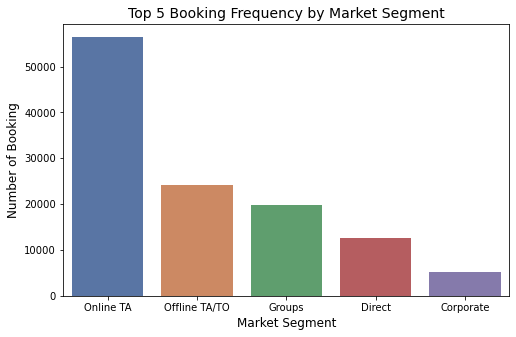

In [29]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df["market_segment"], order=df["market_segment"].value_counts().iloc[:5].index, palette = "deep")
ax.set_title("Top 5 Booking Frequency by Market Segment", size = 14)
ax.set_xlabel("Market Segment", size = 12)
ax.set_ylabel("Number of Booking", size = 12)
plt.show()

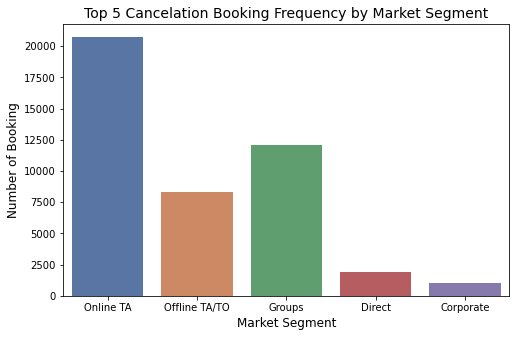

In [30]:
plt.figure(figsize = (8,5))
ax = sns.countplot("market_segment", data= df[df["is_canceled"]==True], 
                   order=df["market_segment"].value_counts().iloc[:5].index, palette = "deep")
ax.set_title("Top 5 Cancelation Booking Frequency by Market Segment", size = 14)
ax.set_xlabel("Market Segment", size = 12)
ax.set_ylabel("Number of Booking", size = 12)
plt.show()

Most guests make hotel bookings on Online TA. Most guests also cancel the most on Online TA. Offline TA / TO is the second market segment that is widely used for hotel bookings, but cancellations are only the third.

## 7. How many bookings were cancelled?

In [31]:
def book_cancel(data, hotel):
    if hotel != 'all_hotel':
        data = data[data['hotel_type']==hotel]
    hotel_cancel = data[data['is_canceled']==True].shape[0]
    all_data = data.shape[0]
    percent_cancel = round((hotel_cancel / all_data *100) ,3)
    print('The number of guests who canceled their bookings for {} was {} out of {} total bookings or {}% of the total bookings.'.format(hotel, hotel_cancel, all_data, percent_cancel))

In [32]:
book_cancel(df, "all_hotel")

The number of guests who canceled their bookings for all_hotel was 44224 out of 119390 total bookings or 37.042% of the total bookings.


In [33]:
book_cancel(df, "City Hotel")

The number of guests who canceled their bookings for City Hotel was 33102 out of 79330 total bookings or 41.727% of the total bookings.


In [34]:
book_cancel(df, "Resort Hotel")

The number of guests who canceled their bookings for Resort Hotel was 11122 out of 40060 total bookings or 27.763% of the total bookings.


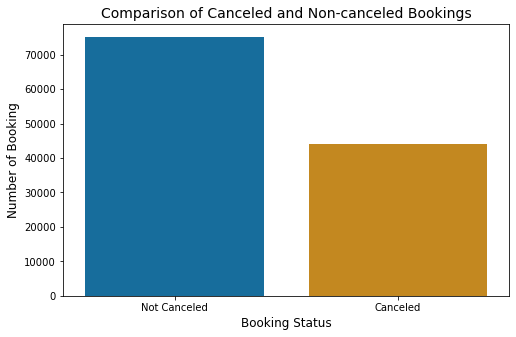

In [35]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x="is_canceled", data=df, palette = "colorblind")
ax.set_title("Comparison of Canceled and Non-canceled Bookings", size = 14)
ax.set_xlabel("Booking Status", size = 12)
ax.set_ylabel("Number of Booking", size = 12)
ax.set_xticks([0,1])
ax.set_xticklabels(['Not Canceled', 'Canceled'])
plt.show()

## 8. Which month has the highest number of cancellations?

In [36]:
df_cancel = df[df['is_canceled']==True]


In [37]:
def cancel(data,hotel):
    if hotel == "all hotel":
        cancel_count = data['arrival_date_month'].value_counts()
    else:
        cancel_count = data[df['hotel_type']== hotel]['arrival_date_month'].value_counts()
        data = data[data['hotel_type']== hotel]
    print("This is the number of cancellations {} in each month:".format(hotel))
    print(cancel_count)
    plt.figure(figsize =(16,8))
    ax= sns.countplot('arrival_date_month', data = data, order =['January','February','March',
                                                                      'April','May','June','July',
                                                                      'August','September','October',
                                                                      'November','December'])
    for p in ax.patches:
        if p.get_bbox().get_points()[1,1]== max(cancel_count):
            p.set_color('tomato')
        elif p.get_bbox().get_points()[1,1]== min(cancel_count):
            p.set_color('aquamarine')
        else:
            p.set_color('tan');
    ax.set_title("Cancelations {} per Month [2015-2017]".format(hotel), size = 16)
    ax.set_xlabel("Month", size = 12)
    ax.set_ylabel("Number of Cancelations", size = 12)
    plt.show()

This is the number of cancellations all hotel in each month:
August       5239
July         4742
May          4677
June         4535
April        4524
October      4246
September    4116
March        3149
February     2696
December     2371
November     2122
January      1807
Name: arrival_date_month, dtype: int64


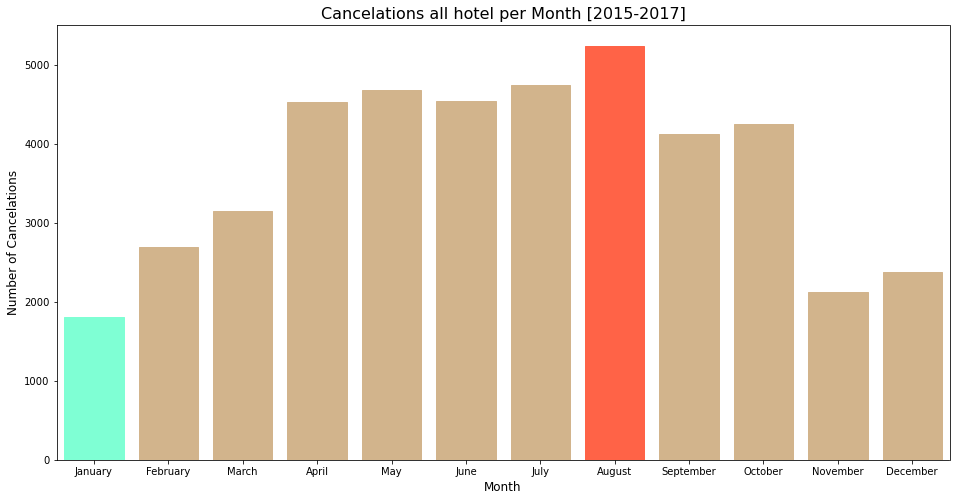

In [38]:
cancel(df_cancel,'all hotel')

This is the number of cancellations City Hotel in each month:
May          3653
August       3602
June         3528
April        3465
July         3306
October      3268
September    3110
March        2386
February     1901
December     1740
November     1661
January      1482
Name: arrival_date_month, dtype: int64


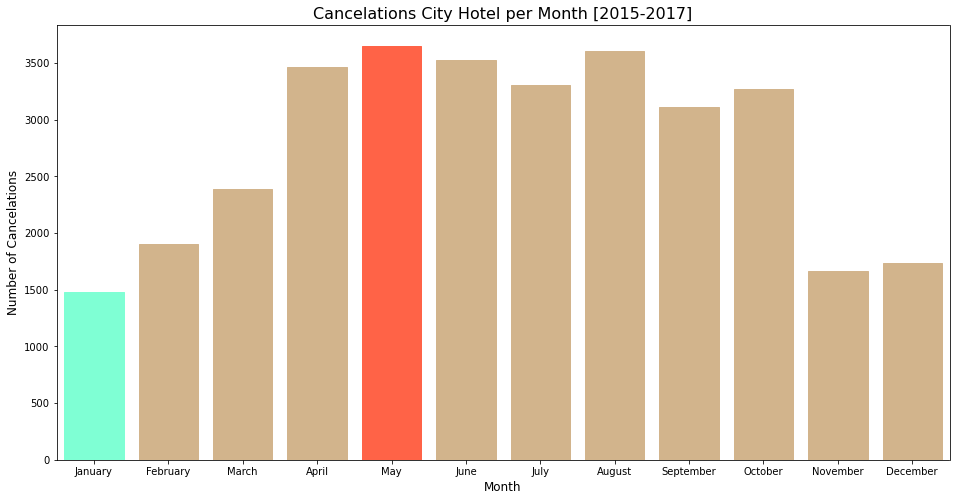

In [39]:
cancel(df_cancel, 'City Hotel')

This is the number of cancellations Resort Hotel in each month:
August       1637
July         1436
April        1059
May          1024
June         1007
September    1006
October       978
February      795
March         763
December      631
November      461
January       325
Name: arrival_date_month, dtype: int64


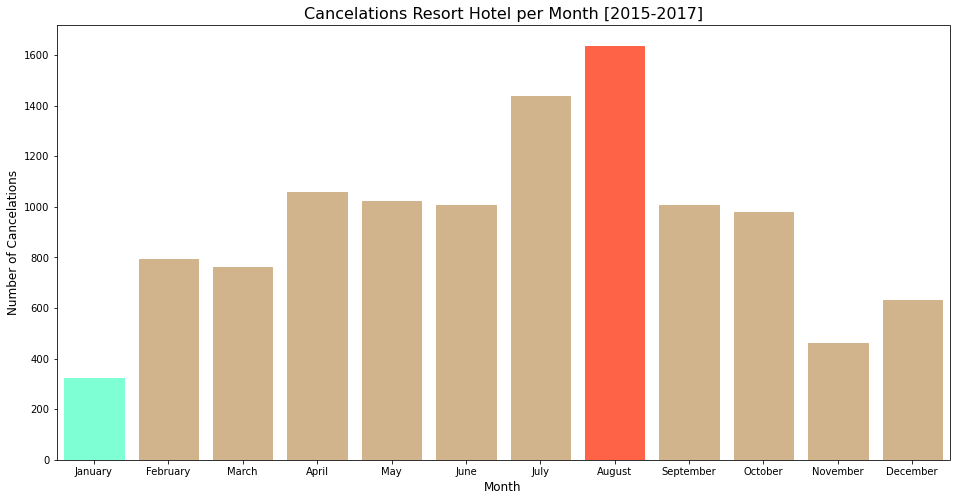

In [40]:
cancel(df_cancel, 'Resort Hotel')

Many people cancel bookings for bookings in May at the City Hotel. While at Resort Hotels, many people cancel bookings for bookings in August.